# 안녕하세요:)

## AIVLE 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## 개인과제
* 데이터 구조, 분포 확인, 전처리 : 1.1_버스정류장데이터 / 1.2 유동인구데이터 / 1.3_주민등록데이터 / 1.4_업종등록데이터
* 데이터간 관계 가설 수립 및 검증 : 1.5_데이터 분석

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1

In [ ]:
정류장수와 승/하차 총 승객수는 연관이 있을 것이다.

* 가설 2

In [ ]:
정류장수와 인구 수는 연관이 있을 것이다.

* 가설 3

In [ ]:
정류장수와 세대 수는 연관이 있을 것이다.

In [ ]:
노선수와 평균 이동 시간은 연관이 있을 것이다. 

In [ ]:
노선 수와 택시 운송업 사업체/종사자 수는 연관이 있을 것이다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [1]:
import pandas as pd
import scipy.stats as spst

In [2]:
data = pd.read_csv('최종_seoul_bus_station.xls')

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,자치구,노선수,정류장수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간,평균 이동 인구,세대,세대당인구,합계(남자),합계(여자),합계,동,택시운송업(사업체수),택시운송업(종사자수),한식 일반 음식점업(사업체수),한식 일반 음식점업(종사자수),용달 화물자동차 운송업(사업체수),용달 화물자동차 운송업(종사자수),부동산 중개 및 대리업(사업체수),부동산 중개 및 대리업(종사자수),두발미용업(사업체수),두발미용업(종사자수),커피전문점(사업체수),커피전문점(종사자수),남녀용 겉옷 및 셔츠 도매업(사업체수),남녀용 겉옷 및 셔츠 도매업(종사자수),기타주점업(사업체수),기타주점업(종사자수),일반 교과 학원(사업체수),일반 교과 학원(종사자수),한식 육류요리 전문점(사업체수),한식 육류요리 전문점(종사자수),SIGUNGU_NM,Area
0,0,강남구,91,499,8030483,7569213,128.767927,121.371512,11437560,4.468465e+07,23.094565,90.226636,234612,2.27,257096,280242,537338,소계,1796,2517,2415,11486,445,487,2337,6508,1241,6255,1624,7273,384,8320,713,2528,1426,9020,827,5008,강남구,39
1,1,강동구,21,369,2890053,2830506,99.161194,97.118065,8430800,2.110146e+07,25.670084,64.249687,201926,2.28,227891,237206,465097,소계,3295,4980,1101,3388,1528,1566,1188,1990,900,1429,546,1660,59,1433,589,1349,620,2104,428,1459,강동구,25
2,2,강북구,67,413,4825181,4671783,133.020373,128.791504,7649610,1.257041e+07,23.811274,39.128470,144725,2.05,145934,154890,300824,소계,1713,2589,965,2663,1024,1030,589,867,673,997,358,1095,40,94,580,1275,220,740,362,1176,강북구,24
3,3,강서구,49,566,4681083,4652828,88.119480,87.587591,9388010,2.183976e+07,25.124068,58.447282,272572,2.10,277797,300629,578426,소계,3735,6922,1325,4584,1799,1862,1311,2352,1015,1751,690,2530,78,700,794,1709,672,2347,581,2274,강서구,41
4,4,관악구,86,466,7655819,7792476,154.753674,157.516040,8772170,1.872564e+07,23.377928,49.904036,279353,1.74,250450,249886,500336,소계,1286,2027,1226,3689,1579,1600,1010,2136,895,1604,581,2049,31,190,658,1672,354,1230,422,1628,관악구,30


In [4]:
data.corr().head()

,Unnamed: 0,노선수,정류장수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간,평균 이동 인구,세대,세대당인구,합계(남자),합계(여자),합계,택시운송업(사업체수),택시운송업(종사자수),한식 일반 음식점업(사업체수),한식 일반 음식점업(종사자수),용달 화물자동차 운송업(사업체수),용달 화물자동차 운송업(종사자수),부동산 중개 및 대리업(사업체수),부동산 중개 및 대리업(종사자수),두발미용업(사업체수),두발미용업(종사자수),커피전문점(사업체수),커피전문점(종사자수),남녀용 겉옷 및 셔츠 도매업(사업체수),남녀용 겉옷 및 셔츠 도매업(종사자수),기타주점업(사업체수),기타주점업(종사자수),일반 교과 학원(사업체수),일반 교과 학원(종사자수),한식 육류요리 전문점(사업체수),한식 육류요리 전문점(종사자수),Area
Unnamed: 0,1.000000,0.320068,-0.212649,-0.089601,-0.083936,-0.104262,-0.104603,0.022523,-0.126464,-0.440892,-0.221974,-0.385798,-0.036684,-0.347917,-0.333952,-0.341136,-0.226838,-0.193746,-0.044804,-0.047025,-0.151217,-0.140200,-0.287625,-0.346003,-0.421054,-0.374886,-0.020118,-0.051039,0.309971,0.190165,-0.283132,-0.311755,-0.265246,-0.254595,-0.169143,-0.157595,-0.251313
노선수,0.320068,1.000000,0.258798,0.665488,0.652642,0.493541,0.470440,0.388332,0.226437,-0.678600,-0.003649,-0.241699,-0.295018,-0.294351,-0.268906,-0.281536,-0.601440,-0.658988,0.404748,0.413556,-0.576136,-0.566670,0.006077,0.077790,-0.261457,0.105499,0.395274,0.425180,0.276170,0.282179,0.147328,0.262016,-0.152747,-0.058862,0.104076,0.264624,0.006328
정류장수,-0.212649,0.258798,1.000000,0.566681,0.578479,-0.135318,-0.099146,0.356947,0.355635,0.223747,0.374723,0.554665,0.315087,0.550032,0.580536,0.566615,0.254818,0.215670,0.157953,0.146445,0.163750,0.171907,0.423486,0.320211,0.485323,0.344539,0.240643,0.209808,-0.485615,-0.418222,0.366972,0.315121,0.347181,0.293698,0.335055,0.291643,0.705873
승차총승객수,-0.089601,0.665488,0.566681,1.000000,0.996610,0.538720,0.547384,0.581339,0.576553,-0.110113,0.474049,0.408783,-0.015831,0.359532,0.368034,0.364433,-0.219573,-0.279193,0.572305,0.574076,-0.187823,-0.190353,0.542368,0.562383,0.357367,0.550024,0.488169,0.530386,-0.151233,-0.024010,0.354584,0.493852,0.349527,0.404332,0.388479,0.522268,0.564022
하차총승객수,-0.083936,0.652642,0.578479,0.996610,1.000000,0.534826,0.555137,0.572769,0.558699,-0.097082,0.463898,0.443088,-0.039725,0.384499,0.390470,0.388119,-0.201816,-0.259460,0.546727,0.538578,-0.139249,-0.141275,0.524065,0.532697,0.367160,0.519330,0.457139,0.494266,-0.165922,-0.051134,0.364663,0.485755,0.328345,0.372778,0.373733,0.491315,0.566280


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             25 non-null     int64  
 1   자치구                    25 non-null     object 
 2   노선수                    25 non-null     int64  
 3   정류장수                   25 non-null     int64  
 4   승차총승객수                 25 non-null     int64  
 5   하차총승객수                 25 non-null     int64  
 6   승차평균승객수                25 non-null     float64
 7   하차평균승객수                25 non-null     float64
 8   총 이동 시간                25 non-null     int64  
 9   총 이동 인구                25 non-null     float64
 10  평균 이동 시간               25 non-null     float64
 11  평균 이동 인구               25 non-null     float64
 12  세대                     25 non-null     int64  
 13  세대당인구                  25 non-null     float64
 14  합계(남자)                 25 non-null     int64  
 15  합계(여자)  

In [6]:
data['Area'].describe()

count    25.000000
mean     24.320000
std       9.303763
min      10.000000
25%      17.000000
50%      24.000000
75%      30.000000
max      47.000000
Name: Area, dtype: float64

In [7]:
data['노선수'].describe()

count     25.000000
mean      72.920000
std       23.808122
min       21.000000
25%       56.000000
50%       71.000000
75%       94.000000
max      107.000000
Name: 노선수, dtype: float64

In [8]:
data['정류장수'].describe()

count     25.000000
mean     424.600000
std      106.279506
min      178.000000
25%      349.000000
50%      435.000000
75%      499.000000
max      602.000000
Name: 정류장수, dtype: float64

In [27]:
data['면적대비 정류장'] = data['정류장수'] / data['Area']
data.sort_values(by='면적대비 정류장').head()

,Unnamed: 0,자치구,노선수,정류장수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간,평균 이동 인구,세대,세대당인구,합계(남자),합계(여자),합계,동,택시운송업(사업체수),택시운송업(종사자수),한식 일반 음식점업(사업체수),한식 일반 음식점업(종사자수),용달 화물자동차 운송업(사업체수),용달 화물자동차 운송업(종사자수),부동산 중개 및 대리업(사업체수),부동산 중개 및 대리업(종사자수),두발미용업(사업체수),두발미용업(종사자수),커피전문점(사업체수),커피전문점(종사자수),남녀용 겉옷 및 셔츠 도매업(사업체수),남녀용 겉옷 및 셔츠 도매업(종사자수),기타주점업(사업체수),기타주점업(종사자수),일반 교과 학원(사업체수),일반 교과 학원(종사자수),한식 육류요리 전문점(사업체수),한식 육류요리 전문점(종사자수),SIGUNGU_NM,Area,면적대비 정류장,면적대비 노선
17,17,송파구,55,415,5641742,5603488,114.270072,113.495260,10610520,3.483761e+07,25.429707,83.493581,285106,2.32,321963,346298,668261,소계,2638,4850,1575,5760,1910,1931,1677,3190,1137,2328,975,3372,147,2830,628,1469,876,4160,639,2781,송파구,34,12.205882,1.617647
14,14,서초구,93,600,7221330,6977950,126.687777,122.418028,10291660,2.891132e+07,22.831643,64.138624,169895,2.41,197665,216012,413677,소계,417,903,1564,6712,386,411,1457,2758,676,1832,1012,3897,157,1563,446,1255,812,3812,445,2338,서초구,47,12.765957,1.978723
0,0,강남구,91,499,8030483,7569213,128.767927,121.371512,11437560,4.468465e+07,23.094565,90.226636,234612,2.27,257096,280242,537338,소계,1796,2517,2415,11486,445,487,2337,6508,1241,6255,1624,7273,384,8320,713,2528,1426,9020,827,5008,강남구,39,12.794872,2.333333
3,3,강서구,49,566,4681083,4652828,88.119480,87.587591,9388010,2.183976e+07,25.124068,58.447282,272572,2.10,277797,300629,578426,소계,3735,6922,1325,4584,1799,1862,1311,2352,1015,1751,690,2530,78,700,794,1709,672,2347,581,2274,강서구,41,13.804878,1.195122
8,8,노원구,57,514,4353295,4292724,88.476211,87.245168,8975240,2.061194e+07,24.029515,55.184590,219065,2.33,247417,267028,514445,소계,4114,6074,866,2650,1730,1736,714,1053,782,1353,535,1748,30,123,355,844,735,3281,428,1557,노원구,36,14.277778,1.583333


In [26]:
data['면적대비 노선'] = data['노선수'] / data['Area']
data.sort_values(by='면적대비 노선').head()

,Unnamed: 0,자치구,노선수,정류장수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간,평균 이동 인구,세대,세대당인구,합계(남자),합계(여자),합계,동,택시운송업(사업체수),택시운송업(종사자수),한식 일반 음식점업(사업체수),한식 일반 음식점업(종사자수),용달 화물자동차 운송업(사업체수),용달 화물자동차 운송업(종사자수),부동산 중개 및 대리업(사업체수),부동산 중개 및 대리업(종사자수),두발미용업(사업체수),두발미용업(종사자수),커피전문점(사업체수),커피전문점(종사자수),남녀용 겉옷 및 셔츠 도매업(사업체수),남녀용 겉옷 및 셔츠 도매업(종사자수),기타주점업(사업체수),기타주점업(종사자수),일반 교과 학원(사업체수),일반 교과 학원(종사자수),한식 육류요리 전문점(사업체수),한식 육류요리 전문점(종사자수),SIGUNGU_NM,Area,면적대비 정류장,면적대비 노선
1,1,강동구,21,369,2890053,2830506,99.161194,97.118065,8430800,2.110146e+07,25.670084,64.249687,201926,2.28,227891,237206,465097,소계,3295,4980,1101,3388,1528,1566,1188,1990,900,1429,546,1660,59,1433,589,1349,620,2104,428,1459,강동구,25,14.760000,0.840000
3,3,강서구,49,566,4681083,4652828,88.119480,87.587591,9388010,2.183976e+07,25.124068,58.447282,272572,2.10,277797,300629,578426,소계,3735,6922,1325,4584,1799,1862,1311,2352,1015,1751,690,2530,78,700,794,1709,672,2347,581,2274,강서구,41,13.804878,1.195122
8,8,노원구,57,514,4353295,4292724,88.476211,87.245168,8975240,2.061194e+07,24.029515,55.184590,219065,2.33,247417,267028,514445,소계,4114,6074,866,2650,1730,1736,714,1053,782,1353,535,1748,30,123,355,844,735,3281,428,1557,노원구,36,14.277778,1.583333
17,17,송파구,55,415,5641742,5603488,114.270072,113.495260,10610520,3.483761e+07,25.429707,83.493581,285106,2.32,321963,346298,668261,소계,2638,4850,1575,5760,1910,1931,1677,3190,1137,2328,975,3372,147,2830,628,1469,876,4160,639,2781,송파구,34,12.205882,1.617647
14,14,서초구,93,600,7221330,6977950,126.687777,122.418028,10291660,2.891132e+07,22.831643,64.138624,169895,2.41,197665,216012,413677,소계,417,903,1564,6712,386,411,1457,2758,676,1832,1012,3897,157,1563,446,1255,812,3812,445,2338,서초구,47,12.765957,1.978723


In [48]:
temp = data.copy()

In [53]:
temp.drop(['택시운송업(사업체수)', '택시운송업(종사자수)', '한식 일반 음식점업(사업체수)', '한식 일반 음식점업(종사자수)', '용달 화물자동차 운송업(사업체수)', '용달 화물자동차 운송업(종사자수)', '부동산 중개 및 대리업(사업체수)', '부동산 중개 및 대리업(종사자수)', '두발미용업(사업체수)', '두발미용업(종사자수)', '커피전문점(사업체수)', '커피전문점(종사자수)', '남녀용 겉옷 및 셔츠 도매업(사업체수)', '남녀용 겉옷 및 셔츠 도매업(종사자수)', '기타주점업(사업체수)', '기타주점업(종사자수)', '일반 교과 학원(사업체수)', '일반 교과 학원(종사자수)', '한식 육류요리 전문점(사업체수)', '한식 육류요리 전문점(종사자수)'], axis=1, inplace=True)

In [54]:
temp.head()

,Unnamed: 0,자치구,노선수,정류장수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,총 이동 시간,총 이동 인구,평균 이동 시간,평균 이동 인구,세대,세대당인구,합계(남자),합계(여자),합계,동,SIGUNGU_NM,Area,면적대비 정류장,면적대비 노선
0,0,강남구,91,499,8030483,7569213,128.767927,121.371512,11437560,4.468465e+07,23.094565,90.226636,234612,2.27,257096,280242,537338,소계,강남구,39,12.794872,2.333333
1,1,강동구,21,369,2890053,2830506,99.161194,97.118065,8430800,2.110146e+07,25.670084,64.249687,201926,2.28,227891,237206,465097,소계,강동구,25,14.760000,0.840000
2,2,강북구,67,413,4825181,4671783,133.020373,128.791504,7649610,1.257041e+07,23.811274,39.128470,144725,2.05,145934,154890,300824,소계,강북구,24,17.208333,2.791667
3,3,강서구,49,566,4681083,4652828,88.119480,87.587591,9388010,2.183976e+07,25.124068,58.447282,272572,2.10,277797,300629,578426,소계,강서구,41,13.804878,1.195122
4,4,관악구,86,466,7655819,7792476,154.753674,157.516040,8772170,1.872564e+07,23.377928,49.904036,279353,1.74,250450,249886,500336,소계,관악구,30,15.533333,2.866667


In [59]:
temp.drop(['Unnamed: 0', '승차총승객수', '하차총승객수', '승차평균승객수', '하차평균승객수', '총 이동 인구', '평균 이동 시간', '평균 이동 인구', '세대', '세대당인구', '합계(남자)', '합계(여자)', '동', 'SIGUNGU_NM'], axis=1, inplace=True)

In [60]:
temp.head()

,자치구,노선수,정류장수,총 이동 시간,합계,Area,면적대비 정류장,면적대비 노선
0,강남구,91,499,11437560,537338,39,12.794872,2.333333
1,강동구,21,369,8430800,465097,25,14.760000,0.840000
2,강북구,67,413,7649610,300824,24,17.208333,2.791667
3,강서구,49,566,9388010,578426,41,13.804878,1.195122
4,관악구,86,466,8772170,500336,30,15.533333,2.866667


In [61]:
temp.drop('합계', axis=1, inplace=True)

In [62]:
temp['면적대비 정류장'] = temp['정류장수'] / temp['Area']
temp.sort_values(by='면적대비 정류장').head()

,자치구,노선수,정류장수,총 이동 시간,Area,면적대비 정류장,면적대비 노선
17,송파구,55,415,10610520,34,12.205882,1.617647
14,서초구,93,600,10291660,47,12.765957,1.978723
0,강남구,91,499,11437560,39,12.794872,2.333333
3,강서구,49,566,9388010,41,13.804878,1.195122
8,노원구,57,514,8975240,36,14.277778,1.583333


In [63]:
temp['면적대비 노선'] = temp['노선수'] / temp['Area']
temp.sort_values(by='면적대비 노선').head()

,자치구,노선수,정류장수,총 이동 시간,Area,면적대비 정류장,면적대비 노선
1,강동구,21,369,8430800,25,14.760000,0.840000
3,강서구,49,566,9388010,41,13.804878,1.195122
8,노원구,57,514,8975240,36,14.277778,1.583333
17,송파구,55,415,10610520,34,12.205882,1.617647
14,서초구,93,600,10291660,47,12.765957,1.978723


In [ ]:
data['면적대비 정류장'].describe()

In [11]:
data['면적대비 정류장'].describe()

count    25.000000
mean     18.633873
std       4.808449
min      12.205882
25%      14.681818
50%      17.208333
75%      23.416667
max      27.375000
Name: 면적대비 정류장, dtype: float64

In [12]:
data['면적대비 노선'].describe()

count    25.000000
mean      3.466266
std       1.969579
min       0.840000
25%       2.333333
50%       3.045455
75%       4.041667
max      10.300000
Name: 면적대비 노선, dtype: float64

In [18]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="Malgun Gothic",#"NanumGothic", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

### 1)


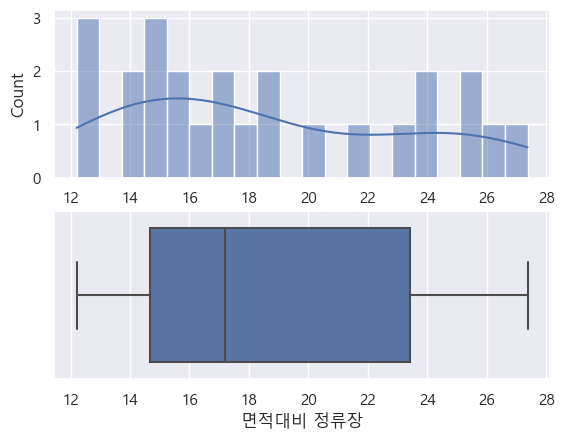

In [19]:
plt.subplot(2, 1, 1)
sns.histplot(x='면적대비 정류장', data=data, bins=20, kde=True)

plt.subplot(2, 1, 2)
sns.boxplot(x=data['면적대비 정류장'])

plt.show()

### 2)

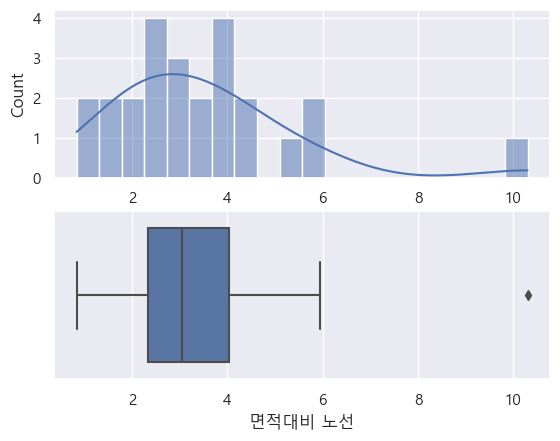

In [20]:
plt.subplot(2, 1, 1)
sns.histplot(x='면적대비 노선', data=data, bins=20, kde=True)

plt.subplot(2, 1, 2)
sns.boxplot(x=data['면적대비 노선'])

plt.show()

### 3)

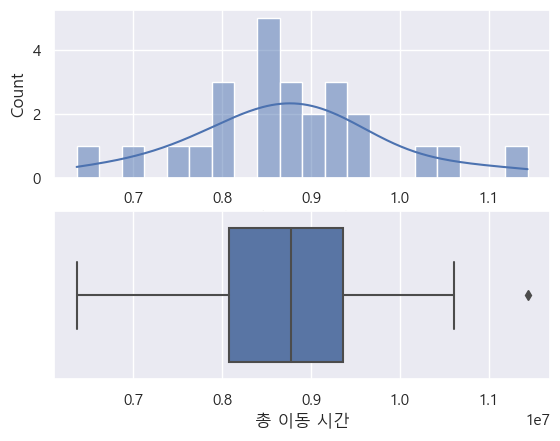

In [21]:
plt.subplot(2, 1, 1)
sns.histplot(x='총 이동 시간', data=data, bins=20, kde=True)

plt.subplot(2, 1, 2)
sns.boxplot(x=data['총 이동 시간'])
plt.show()

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [22]:
result = spst.pearsonr(data['면적대비 정류장'], data['총 이동 시간'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4587929125365234, p-value : 0.021065398139444334



- 음의 상관관계 
- 면적대비 정류장 수와 총 이동 시간은 관련이 있다. 

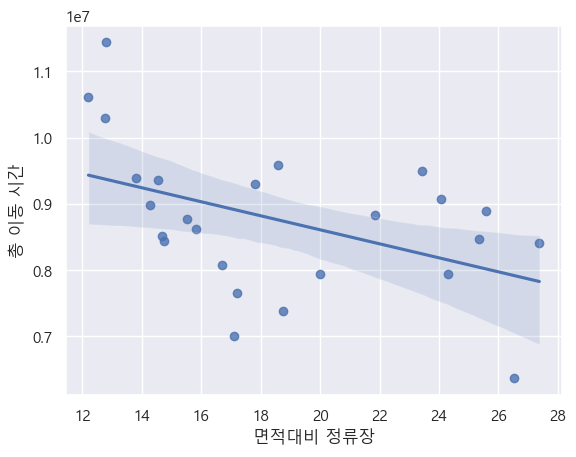

In [23]:
sns.regplot(x='면적대비 정류장', y='총 이동 시간', data=data)
plt.show()

In [24]:
result = spst.pearsonr(data['면적대비 노선'], data['총 이동 시간'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.06830065065315419, p-value : 0.7456362577727963


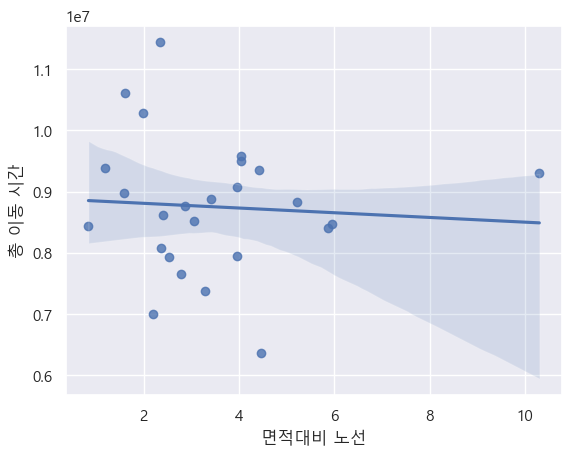

In [25]:
sns.regplot(x='면적대비 노선', y='총 이동 시간', data=data)
plt.show()

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



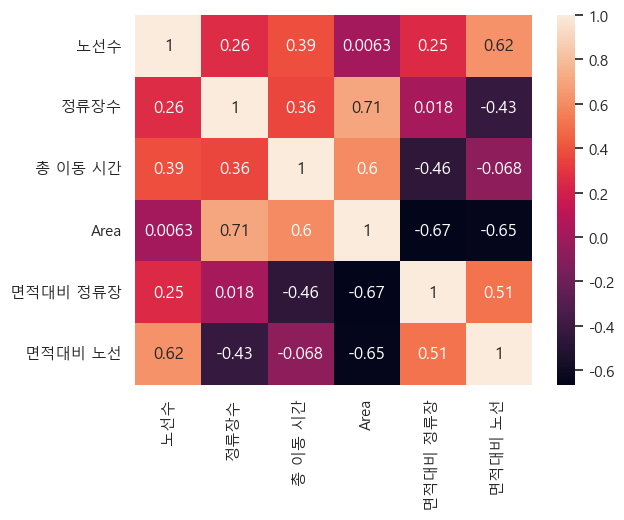

In [64]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(temp.corr(), annot = True)
plt.show()

## 4.관계 정리

### 1) 강한 관계의 변수

- 정류장수 : 승/하차 총 승객수
- 정류장수 : 인구
- 정류장수 : 세대
- 노선수 : 택시운송업 사업체수
- 노선수 : 평균 이동 시간

### 2) 약한 관계의 변수

- 정류장수 : 승/하차 평균 승객수
- 정류장수 : 이동인구
- 정류장 : 일반 교과 학원

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?


- 동대문구 -> 승하차 총 승객 수, 인구, 세대 수 대비 정류장 수 적음. 
- 관악구 -> 승하차 총 승객 수, 인구 수 대비 정류장 수 적음.
- 송파구 -> 인구, 세대 수 대비 정류장 수 적음.
- 광진구 -> 평균 이동 시간 대비 노선 수 적음. 인구, 세대 수 대비 정류장 수 적음.
- 강동구 -> 택시 운송업 사업체 수, 평균 이동 시간 대비 노선 수가 적음. 